In [160]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [12]:
df_nat = pd.read_csv("mhc_nature.tsv", sep="\t")
df_nat["mhc"] = list(map(lambda x: "HLA" + x.replace("*", "").replace(":", ""), df_nat["mhc"]))
df_nat.head()

,mhc,pseudo
0,HLAA0101,MYFFAVGFVRFMYQERNMAHTDANTLYIQIYRDYIWITKWVAQRYRGY
1,HLAA0201,MYFFAVGFVRFMYGERKVAHTHVDTLYVQRYHYYIWTTKWAVQLYTWY
2,HLAA0202,MYFFAVGFVRFMYGERKVAHTHVDTLYLQRYHYYIWTTKWAVQWYTWY
3,HLAA0203,MYFFAVGFVRFMYGERKVAHTHVDTLYVQRYHYYIWTTKWAEQWYTWY
4,HLAA0204,MYFFAVGFVRFMYGERKVAHTHVDTLYVQMYHYYIWTTKWAVQLYTWY


In [6]:
df_our = pd.read_csv("mhc_seq_imghtla.csv")
df_our.head()

,Unnamed: 0,mhc,sequence,pseudo
0,0,HLAA0201,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKHSHRDLLRYNMGQADKEHARYLCLL
1,1,HLAA0211,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKHSDRDLLRYNMGQADKEHARYLCLL
2,2,HLAA2402,SHSMRYFSTSVSRPGRGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKHSDRNLALYNMGQADKEHARYLCLL
3,3,HLAA8001,SHSMRYFFTSVSRPGRGEPRFIAVGYVDDSQFVQFDSDAASQRMEP...,FTVEWETVKHSNRNLLRYNMGQADKERARYLCLL
4,4,HLAA3001,SHSMRYFSTSVSRPGSGEPRFIAVGYVDDTQFVRFDSDAASQRMEP...,FTVEWETVKQSDRDLLRYNMGQADQERARYLCLL


In [15]:
print(df_our.shape)
print(df_nat.shape)
len(set(df_our["mhc"]).intersection(set(df_nat["mhc"])))

(103, 4)
(135, 2)


95

In [17]:
set(df_our["mhc"]).difference(set(df_nat["mhc"]))

{'HLAA7401',
 'HLAB1401',
 'HLAB4202',
 'HLAC0303',
 'HLAC0501',
 'HLAC0802',
 'HLAC1203',
 'HLAC1502'}

In [18]:
set(df_nat["mhc"]).difference(set(df_our["mhc"]))

{'HLAA0208',
 'HLAA0209',
 'HLAA0214',
 'HLAA3003',
 'HLAA3004',
 'HLAA3303',
 'HLAA6602',
 'HLAA6603',
 'HLAB1301',
 'HLAB1403',
 'HLAB1508',
 'HLAB1510',
 'HLAB1512',
 'HLAB1516',
 'HLAB2707',
 'HLAB2709',
 'HLAB3502',
 'HLAB3909',
 'HLAB3910',
 'HLAB4101',
 'HLAB4102',
 'HLAB4103',
 'HLAB4104',
 'HLAB4105',
 'HLAB4405',
 'HLAB4408',
 'HLAB4427',
 'HLAB4701',
 'HLAB4901',
 'HLAB5001',
 'HLAB5102',
 'HLAB5103',
 'HLAB5501',
 'HLAB5502',
 'HLAB5601',
 'HLAC0102',
 'HLAC0304',
 'HLAC0701',
 'HLAC0801',
 'HLAC1601'}

In [27]:
df_thr = pd.read_table("bind_thr.txt")
df_thr["mhc"] = list(map(lambda x: "HLA" + x.replace("*", "").replace(":", ""), df_thr["Allele"]))
df_thr.drop("Allele", 1, inplace=True)
df_thr

,Freq,Thr,mhc
0,16.2,884,HLAA0101
1,25.2,255,HLAA0201
2,3.3,92,HLAA0203
3,4.9,60,HLAA0206
4,15.4,602,HLAA0301
5,12.9,382,HLAA1101
6,6.4,740,HLAA2301
7,16.8,849,HLAA2402
8,2.5,795,HLAA2501
9,4.7,815,HLAA2601


In [88]:
def hamm(seq1, seq2):
    res = 0
    for a,b in zip(seq1, seq2):
        res += a != b
    return res


dist = np.zeros((df_thr.shape[0], df_thr.shape[0]))
diff = np.zeros((df_thr.shape[0], df_thr.shape[0]))
for i in range(dist.shape[0]):
    for j in range(i, dist.shape[0]):
        seq1 = df_nat.ix[df_nat["mhc"] == df_thr["mhc"][i], "pseudo"].iloc[0]
        seq2 = df_nat.ix[df_nat["mhc"] == df_thr["mhc"][j], "pseudo"].iloc[0]
        dist[i,j] = hamm(seq1, seq2)
        dist[j,i] = dist[i,j]
        diff[i,j] = df_thr["Thr"][i] - df_thr["Thr"][j]
        diff[j,i] = df_thr["Thr"][j] - df_thr["Thr"][i]
        
diff

array([[   0.,  629.,  792., ...,  346.,  168.,  438.],
       [-629.,    0.,  163., ..., -283., -461., -191.],
       [-792., -163.,    0., ..., -446., -624., -354.],
       ..., 
       [-346.,  283.,  446., ...,    0., -178.,   92.],
       [-168.,  461.,  624., ...,  178.,    0.,  270.],
       [-438.,  191.,  354., ...,  -92., -270.,    0.]])

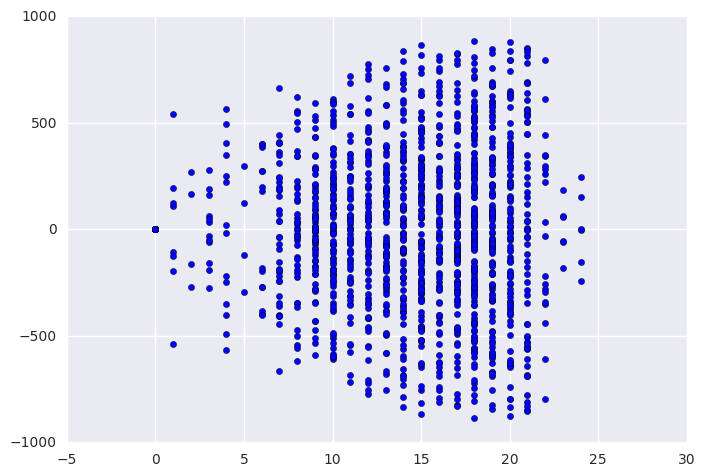

In [90]:
plt.scatter(dist, diff)

In [94]:
def read_df(filepath):
    df = pd.read_table(filepath, sep="\t")

    df.loc[df.meas > 50000, "meas"] = 50000
    df.meas = 1 - np.log(df.meas) / np.log(50000)
    
    df.mhc = list(map(lambda x: x.replace("-", ""), df.mhc))
    df.mhc = list(map(lambda x: x.replace(":", ""), df.mhc))
    df.mhc = list(map(lambda x: x.replace("*", ""), df.mhc))

    df.loc[df.mhc == "HLAA1", "mhc"] = "HLAA0101"
    df.loc[df.mhc == "HLAA11", "mhc"] = "HLAA0101"
    df.loc[df.mhc == "HLAA2", "mhc"] = "HLAA0201"
    df.loc[df.mhc == "HLAA3", "mhc"] = "HLAA0319"
    df.loc[df.mhc == "HLAA3/11", "mhc"] = "HLAA0319"
    df.loc[df.mhc == "HLAA26", "mhc"] = "HLAA2602"
    df.loc[df.mhc == "HLAA24", "mhc"] = "HLAA2403"

    df.loc[df.mhc == "HLAB44", "mhc"] = "HLAB4402"
    df.loc[df.mhc == "HLAB51", "mhc"] = "HLAB5101"
    df.loc[df.mhc == "HLAB7", "mhc"] = "HLAB0702"
    df.loc[df.mhc == "HLAB27", "mhc"] = "HLAB2720"
    df.loc[df.mhc == "HLAB8", "mhc"] = "HLAB0801"

    df.loc[df.mhc == "HLACw1", "mhc"] = "HLAC0401"
    df.loc[df.mhc == "HLACw4", "mhc"] = "HLAC0401"

    df = df.loc[df.mhc != "HLAB60", :]
    
    df = df.ix[df["mhc"] == "HLAA8001", ]
    
    return df

df1 = read_df("bdata.2009.tsv")
df2 = read_df("blind.tsv")

In [101]:
df1.head()

,species,mhc,peptide_length,cv,sequence,inequality,meas
85688,human,HLAA8001,9,TBD,AAKKKGASL,>,0.084687
85689,human,HLAA8001,9,TBD,AALEGLSGF,>,0.084687
85690,human,HLAA8001,9,TBD,AARISSCLK,>,0.084687
85691,human,HLAA8001,9,TBD,AEDLADHHV,>,0.084687
85692,human,HLAA8001,9,TBD,AELIDSFTW,>,0.084687


/home/vdn/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


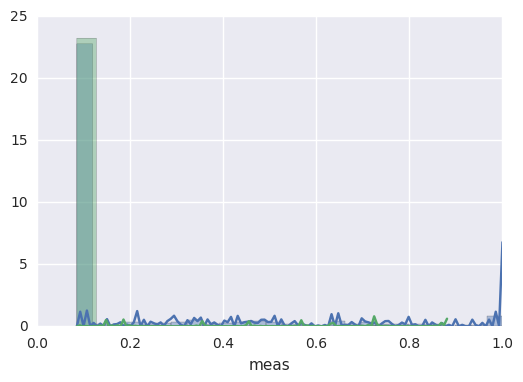

In [97]:
sns.distplot(df1["meas"])
sns.distplot(df2["meas"])

In [98]:
df1.shape

(782, 7)

In [100]:
df2.shape

(379, 7)

In [104]:
set(df1["sequence"]).intersection(df2["sequence"])

set()

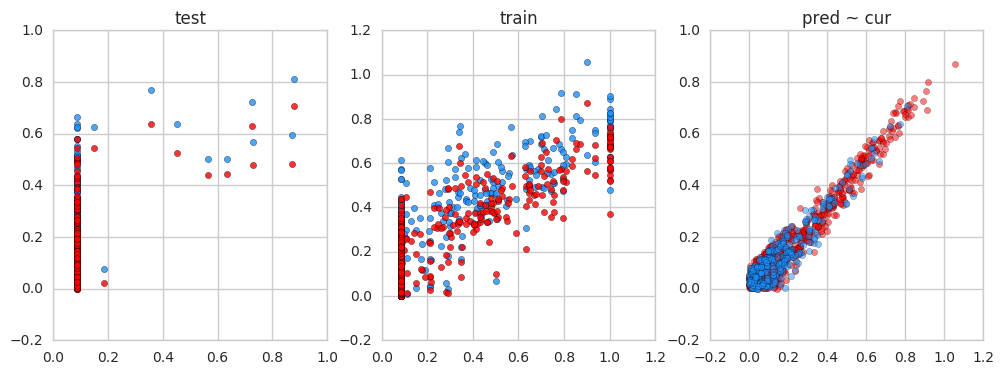

In [181]:
pred_old = pred
pred2_old = pred2

pred = [float(x) for x in open("../models_local/cnn.128.64_bal/pred.txt")]
pred2 = [float(x) for x in open("../models_local/cnn.128.64_bal/pred_tr.txt")]

fig, ax = plt.subplots(ncols=3)
fig.set_figwidth(12)
ax[0].scatter(df2["meas"], pred, c="dodgerblue", alpha=.8)
ax[0].scatter(df2["meas"], pred_old, c="red", alpha=.8)
ax[1].scatter(df1["meas"], pred2, c="dodgerblue", alpha=.8)
ax[1].scatter(df1["meas"], pred2_old, c="red", alpha=.8)
ax[2].scatter(pred2, pred2_old, c="red", alpha=.5)
ax[2].scatter(pred, pred_old, c="dodgerblue", alpha=.5)

ax[0].set_title("test")
ax[1].set_title("train")
ax[2].set_title("pred ~ cur")